In [39]:
# importing the necessary lib/packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#upload data using pandas data frame
data = pd.read_csv('titanic3.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [41]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [42]:
#the attributes body and boat are dropped.
data = data.drop(['boat','body'],axis=1)

In [43]:
data['embarked'].value_counts()


S    914
C    270
Q    123
Name: embarked, dtype: int64

,Total,Percent
age,263,20.091673
cabin,1014,77.463713
embarked,2,0.152788
fare,1,0.076394
home.dest,564,43.086325


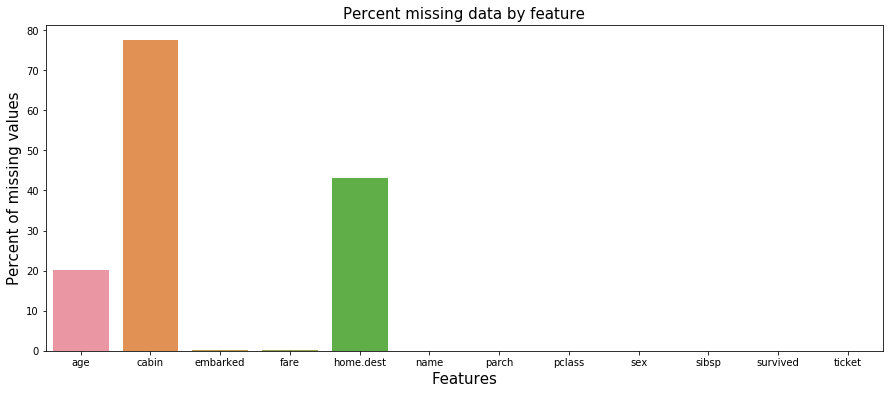

In [44]:
# missing data with aggregation and graph
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count().sort_values(ascending=False))*100
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [45]:
#filled empty fare with median
data.fare.fillna(data.fare.median(),inplace=True)

In [46]:
# filled empty embarked values with most repeated one
data.embarked.fillna(data.embarked.mode()[0],inplace=True)

In [47]:
# I am removing the cabin and home destination as there are more data missing. I think It won't affect the model.
data = data.drop(['cabin','home.dest'],axis=1)

In [48]:
# I am using mean to fill the missing age data.
data.age.fillna(data.age.mean(),inplace=True)

In [49]:
# i am coverting sex column(male,female) to 0 or 1 
data['sex'] = pd.factorize(data.sex)[0]

# i am droping name,ticket,embarked because they all are independent 
data = data.drop(['name','ticket','embarked'],axis=1)

#seperate dataset into x and y
x = data.drop(['survived'],axis=1)
y = data['survived']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
sex         1309 non-null int64
age         1309 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
dtypes: float64(2), int64(5)
memory usage: 71.7 KB


# Over Sampling

(500, 7) (809, 7)
Original dataset shape Counter({0: 809, 1: 500})
Resampled dataset shape Counter({1: 741, 0: 741})
Original dataset shape Counter({0: 809, 1: 500})
Resampled dataset shape Counter({0: 809, 1: 566})
Original dataset shape Counter({0: 809, 1: 500})
Resampled dataset shape Counter({0: 723, 1: 480})


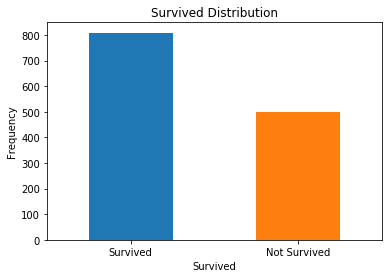

In [50]:
data.isnull().values.any()
LABELS = ["Survived", "Not Survived"]
count_classes = pd.value_counts(data['survived'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Survived Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Survived")
plt.ylabel("Frequency")

## Get the Survived and not Survived dataset 
survived = data[data['survived']==1]
not_survived = data[data['survived']==0]
print(survived.shape,not_survived.shape)

In [59]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res1,y_res1=smk.fit_sample(x,y)
X_res.shape,y_res.shape


from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

#split data set into test and train
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(X_res1,y_res1,test_size=0.3)

#creating the Optimized random forest model
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 1, n_estimators = 1000, min_samples_split = 42,n_jobs = 1,oob_score =True,max_features="auto",min_samples_leaf=5)
model1.fit(x_train1,y_train1)
y1_predict = model1.predict(x_test1)

# finding an accuracy and area under roc curve
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy Score",accuracy_score(y1_predict,y_test1))
print("ROC AUC Score",roc_auc_score(y1_predict,y_test1))

#Precision and Recall:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y1_predict,y_test1))
print("Recall:",recall_score(y1_predict,y_test1))


Original dataset shape Counter({0: 809, 1: 500})
Resampled dataset shape Counter({0: 500, 1: 500})
Accuracy Score 0.8471910112359551
ROC AUC Score 0.846626388776255
Precision: 0.8559322033898306
Recall: 0.8559322033898306


In [60]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(ratio=0.7)
X_train_res2, y_train_res2 = os.fit_sample(x, y)
X_train_res2.shape,y_train_res2.shape

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res2)))

#split data set into test and train
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(X_train_res2,y_train_res2,test_size=0.3)

#creating the Optimized random forest model
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state = 1, n_estimators = 1000, min_samples_split = 42,n_jobs = 1,oob_score =True,max_features="auto",min_samples_leaf=5)
model2.fit(x_train,y_train)
y2_predict = model2.predict(x_test2)

# finding an accuracy and area under roc curve
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy Score",accuracy_score(y2_predict,y_test2))
print("ROC AUC Score",roc_auc_score(y2_predict,y_test2))

#Precision and Recall:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y2_predict,y_test2))
print("Recall:",recall_score(y2_predict,y_test2))

Original dataset shape Counter({0: 809, 1: 500})
Resampled dataset shape Counter({0: 809, 1: 566})
Accuracy Score 0.7288135593220338
ROC AUC Score 0.7400712230555162
Precision: 0.8618421052631579
Recall: 0.5900900900900901


In [61]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(ratio=0.7)
X_train_res3, y_train_res3 = os_us.fit_sample(x, y)
X_train_res3.shape,y_train_res3.shape


print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res3)))

#split data set into test and train
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3 = train_test_split(X_train_res3,y_train_res3,test_size=0.3)

#creating the Optimized random forest model
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state = 1, n_estimators = 1000, min_samples_split = 42,n_jobs = 1,oob_score =True,max_features="auto",min_samples_leaf=5)
model3.fit(x_train,y_train)
y3_predict = model4.predict(x_test3)

# finding an accuracy and area under roc curve
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy Score",accuracy_score(y3_predict,y_test3))
print("ROC AUC Score",roc_auc_score(y3_predict,y_test3))

#Precision and Recall:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y3_predict,y_test3))
print("Recall:",recall_score(y3_predict,y_test3))

Original dataset shape Counter({0: 809, 1: 500})
Resampled dataset shape Counter({0: 721, 1: 478})
Accuracy Score 0.7972222222222223
ROC AUC Score 0.8013978228599704
Precision: 0.8807947019867549
Recall: 0.7074468085106383


# Under Sampling

In [51]:
# Implementing Undersampling for Handling Imbalanced 
from imblearn.under_sampling import NearMiss
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(x,y)

X_res.shape,y_res.shape

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 809, 1: 500})
Resampled dataset shape Counter({0: 500, 1: 500})


In [52]:
#split data set into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3)

In [58]:
#creating the Optimized random forest model
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(random_state = 1, n_estimators = 1000, min_samples_split = 42,n_jobs = 1,oob_score =True,max_features="auto",min_samples_leaf=5)
model4.fit(x_train,y_train)
y4_predict = model4.predict(x_test)

# finding an accuracy and area under roc curve
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy Score",accuracy_score(y4_predict,y_test))
print("ROC AUC Score",roc_auc_score(y4_predict,y_test))

#Precision and Recall:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y4_predict,y_test))
print("Recall:",recall_score(y4_predict,y_test))

Accuracy Score 0.8233333333333334
ROC AUC Score 0.8229018492176388
Precision: 0.841726618705036
Recall: 0.7905405405405406


4Q)Handle the class imbalance problem on the training set and train a classifier (using the setup found in 3) with the original data and the manipulated data, compare the performance using precision and recall.
a)Motivate which setup is most suitable for the task

-->I have used over sampling,under sampling techniques and the most suitable is Under Sampling technique, You can see that Precision and Recall numbers are increased. 